# California Crime Compendium: Comparing Campuses

## Table of Contents:
Introduction
1. Import and manipulation of Datasets
2. Merge Datasets into categories:
    - Agency
    - University
    - City
    - County
3. DataFrames treatment:
    - 3.1 df_Agency
        - 3.1.1- BARPLOTS: quantity of each type of crime by type of agencies
        - 3.1.2- HEATMAP: Crimes/enforcement x type of agencies
        - 3.1.3- TABLE: 5 agencies with larger total crime / law employees ratio
        - 3.1.4- TABLE: 4 agencies with lower total crime / law employees ratio
    - 3.2 df_University
        - 3.2.1- BARPLOTS: quantity of each type of crime by type of universities
        - 3.2.2- PAIRPLOT: Students x Enforcement employees x Crimes x Violent Crimes, by type of universities
        - 3.2.3- LMPLOT: Students enrollment x total crime, by type of universities
        - 3.2.4- LMPLOT: Students enrollment x Violent crimes, by type of universities
        - 3.2.5- LMPLOT: Students enrollment x Property crimes, by type of universities
        - 3.2.6- LMPLOT: Total law/enforcement employees x Students enrollment, by type of universities
        - 3.2.7- BOXPLOT: quantity of crimes by syzes of universities
        - 3.2.8- TABLES: Analazing the 2 Universities with the higher crimes per capta
        - 3.2.9- TABLE: 5 Universities with lower crimes per capta
        - 3.2.10- TABLE: 5 Universities with higher crimes per capta
    - 3.3 df_City
        - 3.3.1- BARPLOTS: quantity of each type of crime by the size of the Cities
        - 3.3.2- BASEMAP: Distribution of Violence among the Population in each City
        - 3.3.3- BOXPLOT: City Size x Crime per capta
        - 3.3.4- HEATMAP: Class of crimes/population x type of Cities
        - 3.3.5- TABLE: 5 cities with higher crimes per capta
        - 3.3.6- TABLE: 4 cities with lower crimes per capta
    - 3.4 df_County
        - 3.4.1- BARPLOTS: quantity of each type of crime by the County ( Metropolitan / Nonmetropolitan )
        - 3.4.2- TABLE: 5 Counties with larger total crime / law employees ratio
        - 3.4.3- TABLE: 5 Counties with lower total crime / law employees ratio

Conclusion

# Introduction

   In this notebook, we will use 8 Datasets from "California Crime and Law Enforcement employment data from 2015". These police and criminal statistics were provided by the FBI through the Kaggle Dataset. 
   The eight datasets cross locations such as: law enforcement agencies, universities, cities and counties, with: law enforcement employees and crimes. We will merge them in those locations and analyze each one of them.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings('ignore')

# 1- Import and manipulation of Datasets

In this step, we imported the Dataset files in .txt, converting them into DataFrames and reading them with .info( ). Through this tool, we can evaluate the need to change the type ('str' to 'int') of the numeric columns or even add useful columns.

In [2]:
df1 = pd.read_csv('ca_law_enforcement_by_agency.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   State/Tribal/Other                26 non-null     object
 1   Agency                            26 non-null     object
 2   Unit/Office                       3 non-null      object
 3   Total law/enforcement/ employees  26 non-null     int64 
 4   Total officers                    26 non-null     int64 
 5   Total civilians                   26 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.3+ KB


In [3]:
df1.head()

,State/Tribal/Other,Agency,Unit/Office,Total law/enforcement/ employees,Total officers,Total civilians
0,State Agencies,Atascadero State Hospital,NaN,139,128,11
1,State Agencies,California State Fair,NaN,3,3,0
2,State Agencies,Coalinga State Hospital,NaN,228,210,18
3,State Agencies,Department of Parks and Recreation,Capital,560,530,30
4,State Agencies,Fairview Developmental Center,NaN,17,14,3


In [4]:
df2 = pd.read_csv('ca_law_enforcement_by_campus.txt',sep=',')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   University/College               48 non-null     object 
 1   Campus                           29 non-null     object 
 2   Student                          48 non-null     int64  
 3   enrollment                       48 non-null     int64  
 4   Total law/enforcement employees  48 non-null     float64
 5   Total officers                   48 non-null     float64
 6   Total civilians                  48 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.8+ KB


The ['Campus / Student'] and ['enrollment'] columns should be just one column, but the thousands have been divided with a comma, resulting in the separation of the columns. To correct the error, we created a new column ['student enrollment'], where:

Student enrollment = (['Campus / Student'] * 1000) + ['enrollment']

Thus, the ['Campus / Student'] and ['enrollment'] columns can be deleted.
That done, we created a new column, ['enforcement per_capta'], with the percentage ratio between the number of students and the police employees.

In [5]:
df2['Student enrollment']= (df2['Student']*1000)+df2['enrollment'].astype(float)
df2.drop('Student',axis=1,inplace=True)
df2.drop('enrollment',axis=1,inplace=True)
df2['enforcement per_capta'] = df2['Total law/enforcement employees']/df2['Student enrollment'] 
df2.head()

,University/College,Campus,Total law/enforcement employees,Total officers,Total civilians,Student enrollment,enforcement per_capta
0,Allan Hancock College,NaN,10.0,5.0,5.0,11047.0,0.000905
1,California State Polytechnic University,Pomona,27.0,19.0,8.0,23966.0,0.001127
2,California State Polytechnic University,San Luis Obispo,33.0,17.0,16.0,20186.0,0.001635
3,California State University,Bakersfield,21.0,14.0,7.0,8720.0,0.002408
4,California State University,Channel Islands,28.0,14.0,14.0,5879.0,0.004763


In [6]:
df3 = pd.read_csv('ca_law_enforcement_by_city.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   City                              333 non-null    object
 1   Population                        333 non-null    object
employees  333 non-null    object
officers                   333 non-null    object
civilians                  333 non-null    object
dtypes: object(5)
memory usage: 13.1+ KB


We transformed the ['Population'] and ['Total law \ renforcement \ remployees'] columns from 'str' to 'int' and removed the comma.
And created the column ['enforcement per_capta'] with the percentage of police employees per inhabitant.

In [7]:
df3['Population'] = df3['Population'].str.replace(r'\D', '').astype(int)
df3['Total law\renforcement \remployees'] = df3['Total law\renforcement \remployees'].str.replace(r'\D', '').astype(int)
df3['Total \rofficers'] = df3['Total \rofficers'].str.replace(r'\D', '').astype(int)
df3['Total \rcivilians'] = df3['Total \rcivilians'].str.replace(r'\D', '').astype(int)
df3['enforcement per_capta'] = df3['Total law\renforcement \remployees']/df3['Population']
df3.head()

,City,Population,Total law\renforcement \remployees,Total \rofficers,Total \rcivilians,enforcement per_capta
0,Alameda,78613,112,83,29,0.001425
1,Albany,19723,30,23,7,0.001521
2,Alhambra,86175,128,85,43,0.001485
3,Alturas,2566,6,5,1,0.002338
4,Anaheim,349471,577,399,178,0.001651


In [8]:
df4=pd.read_csv('ca_law_enforcement_by_county.csv')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Metropolitan/Nonmetropolitan        58 non-null     object
 1   County                              58 non-null     object
employees  58 non-null     object
officers                      58 non-null     object
civilians                     58 non-null     object
dtypes: object(5)
memory usage: 2.4+ KB


In df4, we did the same as df3. Turnning 'str' in 'int' and removing the commas.

In [9]:
df4['Total\rofficers'] = df4['Total\rofficers'].str.replace(r'\D', '').astype(int)
df4['Total\rcivilians'] = df4['Total\rcivilians'].str.replace(r'\D', '').astype(int)
df4['Total law/\renforcement /\remployees'] = df4['Total law/\renforcement /\remployees'].str.replace(r'\D', '').astype(int)
df4.head()

,Metropolitan/Nonmetropolitan,County,Total law/\renforcement /\remployees,Total\rofficers,Total\rcivilians
0,Metropolitan Counties,Alameda,1560,978,582
1,Metropolitan Counties,Butte,288,101,187
2,Metropolitan Counties,Contra Costa,936,610,326
3,Metropolitan Counties,El Dorado,349,164,185
4,Metropolitan Counties,Fresno,1043,406,637


In [10]:
df5=pd.read_csv('ca_offenses_by_agency.csv')
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   State/Tribal/Other                    169 non-null    object 
 1   Agency                                169 non-null    object 
 2   Unit/Office                           143 non-null    object 
 3   Violent crime                         169 non-null    float64
 4   Murder and nonnegligent manslaughter  169 non-null    float64
 5   Rape (revised definition)             169 non-null    float64
 6   Rape (legacy definition)              0 non-null      float64
 7   Robbery                               169 non-null    float64
 8   Aggravated assault                    169 non-null    float64
 9   Property crime                        169 non-null    object 
 10  Burglary                              169 non-null    float64
 11  Larceny-theft      

In df5, in addition to the comma, we removed the ['Rape (legacy definition)'] column, which contained only NaN data.

In [11]:
df5['Property crime'] = df5['Property crime'].str.replace(r'\D', '').astype(float)
df5['Larceny-theft'] = df5['Larceny-theft'].str.replace(r'\D', '').astype(float)
df5['Motor vehicle theft'] = df5['Motor vehicle theft'].str.replace(r'\D', '').astype(float)
df5.drop('Rape (legacy definition)',axis=1,inplace=True)
df5.head()

,State/Tribal/Other,Agency,Unit/Office,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,State Agencies,Atascadero State Hospital4,NaN,321.0,0.0,0.0,0.0,321.0,4.0,0.0,2.0,2.0,0.0
1,State Agencies,California State Fair4,NaN,12.0,0.0,0.0,0.0,12.0,79.0,21.0,56.0,2.0,1.0
2,State Agencies,Coalinga State Hospital,NaN,149.0,0.0,0.0,0.0,149.0,3.0,1.0,2.0,0.0,0.0
3,State Agencies,Department of Parks and Recreation,Angeles,2.0,0.0,0.0,1.0,1.0,26.0,8.0,18.0,0.0,0.0
4,State Agencies,Department of Parks and Recreation,Bay Area,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [12]:
df6=pd.read_csv('ca_offenses_by_campus.csv')
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   University/College                    49 non-null     object 
 1   Campus                                30 non-null     object 
 2   Student enrollment                    48 non-null     object 
 3   Violent crime                         49 non-null     float64
 4   Murder and nonnegligent manslaughter  49 non-null     float64
 5   Rape (revised definition)             49 non-null     float64
 6   Rape (legacy definition)              0 non-null      float64
 7   Robbery                               49 non-null     float64
 8   Aggravated assault                    49 non-null     float64
 9   Property crime                        49 non-null     float64
 10  Burglary                              49 non-null     float64
 11  Larceny-theft        

We performed the same operations as the df5, in addition to removing the number '4' from ['Campus'] cells that shouldn't have it.

In [13]:
df6['Campus'] = df6['Campus'].str.replace('4', '')
df6['Student enrollment'] = df6['Student enrollment'].str.replace(r'\D', '').astype(float)
df6.drop('Rape (legacy definition)',axis=1,inplace=True)
df6.head()

,University/College,Campus,Student enrollment,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Allan Hancock College,NaN,11047.0,0.0,0.0,0.0,0.0,0.0,21.0,2.0,18.0,1.0,0.0
1,California State Polytechnic University,Pomona,23966.0,6.0,0.0,4.0,1.0,1.0,173.0,5.0,150.0,18.0,1.0
2,California State Polytechnic University,San Luis Obispo,20186.0,3.0,0.0,2.0,0.0,1.0,163.0,7.0,149.0,7.0,1.0
3,California State University,Bakersfield,8720.0,1.0,0.0,0.0,0.0,1.0,78.0,12.0,65.0,1.0,0.0
4,California State University,Channel Islands,5879.0,2.0,0.0,0.0,1.0,1.0,62.0,7.0,54.0,1.0,0.0


In [14]:
df7=pd.read_csv('ca_offenses_by_city.csv')
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   City                                  460 non-null    object 
 1   Population                            460 non-null    object 
 2   Violent crime                         460 non-null    object 
 3   Murder and nonnegligent manslaughter  460 non-null    int64  
 4   Rape (revised definition)             460 non-null    object 
 5   Rape (legacy definition)              0 non-null      float64
 6   Robbery                               460 non-null    object 
 7   Aggravated assault                    460 non-null    object 
 8   Property crime                        460 non-null    object 
 9   Burglary                              460 non-null    object 
 10  Larceny-theft                         460 non-null    object 
 11  Motor vehicle theft

df7 was the same as df6, ['Rape (legacy definition)] null removed and 'str' convert int 'float', but the number removed from the column ['City'] was '3'.

In [15]:
df7['City'] = df7['City'].str.replace('3', '')
df7['Population'] = df7['Population'].str.replace(r'\D', '').astype(float)
df7['Violent crime'] = df7['Violent crime'].str.replace(r'\D', '').astype(float)
df7['Rape (revised definition)'] = df7['Rape (revised definition)'].str.replace(r'\D', '').astype(float)
df7['Robbery'] = df7['Robbery'].str.replace(r'\D', '').astype(float)
df7['Aggravated assault'] = df7['Aggravated assault'].str.replace(r'\D', '').astype(float)
df7['Burglary'] = df7['Burglary'].str.replace(r'\D', '').astype(float)
df7['Property crime'] = df7['Property crime'].str.replace(r'\D', '').astype(float)
df7['Larceny-theft'] = df7['Larceny-theft'].str.replace(r'\D', '').astype(float)
df7['Motor vehicle theft'] = df7['Motor vehicle theft'].str.replace(r'\D', '').astype(float)
df7['Arson'] = df7['Arson'].str.replace(r'\D', '').astype(float)
df7.drop('Rape (legacy definition)',axis=1,inplace=True)
df7.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Adelanto,33005.0,212.0,2,14.0,48.0,148.0,808.0,434.0,254.0,120.0,24.0
1,Agoura Hills,20970.0,15.0,0,1.0,6.0,8.0,310.0,82.0,217.0,11.0,0.0
2,Alameda,78613.0,148.0,2,7.0,61.0,78.0,1819.0,228.0,1245.0,346.0,18.0
3,Albany,19723.0,34.0,1,6.0,16.0,11.0,605.0,95.0,447.0,63.0,0.0
4,Alhambra,86175.0,168.0,1,13.0,74.0,80.0,1929.0,305.0,1413.0,211.0,6.0


In [16]:
df8=pd.read_csv('ca_offenses_by_county.csv')
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Metropolitan/Nonmetropolitan          57 non-null     object 
 1   County                                57 non-null     object 
 2   Violent crime                         57 non-null     object 
 3   Murder and nonnegligent manslaughter  57 non-null     float64
 4   Rape (revised definition)             57 non-null     float64
 5   Rape(legacy definition)               0 non-null      float64
 6   Robbery                               57 non-null     object 
 7   Aggravated assault                    57 non-null     object 
 8   Property crime                        57 non-null     object 
 9   Burglary                              57 non-null     object 
 10  Larceny-theft                         57 non-null     object 
 11  Motor vehicle the

df8 had exactely the same changes as df7.

In [17]:
df8['County'] = df8['County'].str.replace('3', '')
df8['Violent crime'] = df8['Violent crime'].str.replace(r'\D', '').astype(float)
df8['Robbery'] = df8['Robbery'].str.replace(r'\D', '').astype(float)
df8['Aggravated assault'] = df8['Aggravated assault'].str.replace(r'\D', '').astype(float)
df8['Burglary'] = df8['Burglary'].str.replace(r'\D', '').astype(float)
df8['Property crime'] = df8['Property crime'].str.replace(r'\D', '').astype(float)
df8['Larceny-theft'] = df8['Larceny-theft'].str.replace(r'\D', '').astype(float)
df8['Motor vehicle theft'] = df8['Motor vehicle theft'].str.replace(r'\D', '').astype(float)
df8.drop('Rape(legacy definition)',axis=1,inplace=True)
df8.head()

,Metropolitan/Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Metropolitan Counties,Alameda,510.0,6.0,13.0,177.0,314.0,2077.0,463.0,985.0,629.0,11.0
1,Metropolitan Counties,Butte,155.0,4.0,20.0,14.0,117.0,1422.0,708.0,693.0,21.0,0.0
2,Metropolitan Counties,Contra Costa,426.0,14.0,24.0,153.0,235.0,2013.0,660.0,1332.0,21.0,18.0
3,Metropolitan Counties,El Dorado,252.0,9.0,46.0,32.0,165.0,2031.0,577.0,1412.0,42.0,4.0
4,Metropolitan Counties,Fresno,962.0,8.0,32.0,112.0,810.0,3810.0,1398.0,1838.0,574.0,145.0


# 2- Merge Datasets into categories:

We merged DataFrames with equivalent columns:

- Agency: df1, df5
- University: df2, df6
- City: df3, df7
- County: df4, df8


In [18]:
df_agency = pd.merge(df1,df5, on=[df1.columns[0],df1.columns[1],df1.columns[2]])
df_agency.head()

,State/Tribal/Other,Agency,Unit/Office,Total law/enforcement/ employees,Total officers,Total civilians,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,State Agencies,Coalinga State Hospital,NaN,228,210,18,149.0,0.0,0.0,0.0,149.0,3.0,1.0,2.0,0.0,0.0
1,State Agencies,Department of Parks and Recreation,Capital,560,530,30,0.0,0.0,0.0,0.0,0.0,7.0,2.0,5.0,0.0,1.0
2,State Agencies,Sonoma Developmental Center,NaN,17,7,10,6.0,0.0,0.0,0.0,6.0,2.0,0.0,2.0,0.0,0.0
3,Tribal Agencies,Coyote Valley Tribal,NaN,6,5,1,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,Tribal Agencies,La Jolla Tribal,NaN,2,2,0,5.0,0.0,0.0,4.0,1.0,8.0,2.0,6.0,0.0,0.0


In [19]:
df_university = pd.merge(df2,df6, on=[df2.columns[0],df2.columns[1],df2.columns[5]])
df_university.head()

,University/College,Campus,Total law/enforcement employees,Total officers,Total civilians,Student enrollment,enforcement per_capta,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Allan Hancock College,NaN,10.0,5.0,5.0,11047.0,0.000905,0.0,0.0,0.0,0.0,0.0,21.0,2.0,18.0,1.0,0.0
1,California State Polytechnic University,Pomona,27.0,19.0,8.0,23966.0,0.001127,6.0,0.0,4.0,1.0,1.0,173.0,5.0,150.0,18.0,1.0
2,California State Polytechnic University,San Luis Obispo,33.0,17.0,16.0,20186.0,0.001635,3.0,0.0,2.0,0.0,1.0,163.0,7.0,149.0,7.0,1.0
3,California State University,Bakersfield,21.0,14.0,7.0,8720.0,0.002408,1.0,0.0,0.0,0.0,1.0,78.0,12.0,65.0,1.0,0.0
4,California State University,Channel Islands,28.0,14.0,14.0,5879.0,0.004763,2.0,0.0,0.0,1.0,1.0,62.0,7.0,54.0,1.0,0.0


The line [314] of df3 ( [298] of df_city ) presents a data error, where [Total law \ reforfor \ remployees] is practically half of [Population], as we can see in the next line. In order not to compromise the graphics, we will disregard this line.

In [20]:
df3[df3['City']=='Vernon']

,City,Population,Total law\renforcement \remployees,Total \rofficers,Total \rcivilians,enforcement per_capta
314,Vernon,115,49,37,12,0.426087


In [21]:
df_city = pd.merge(df3,df7, on=[df3.columns[0],df3.columns[1]])
df_city.drop([298],axis=0, inplace=True)
df_city.head()

,City,Population,Total law\renforcement \remployees,Total \rofficers,Total \rcivilians,enforcement per_capta,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Alameda,78613,112,83,29,0.001425,148.0,2,7.0,61.0,78.0,1819.0,228.0,1245.0,346.0,18.0
1,Albany,19723,30,23,7,0.001521,34.0,1,6.0,16.0,11.0,605.0,95.0,447.0,63.0,0.0
2,Alhambra,86175,128,85,43,0.001485,168.0,1,13.0,74.0,80.0,1929.0,305.0,1413.0,211.0,6.0
3,Alturas,2566,6,5,1,0.002338,35.0,0,13.0,2.0,20.0,61.0,9.0,48.0,4.0,4.0
4,Anaheim,349471,577,399,178,0.001651,1271.0,18,129.0,439.0,685.0,10038.0,1476.0,6893.0,1669.0,28.0


In [22]:
df_county = pd.merge(df4,df8, on=[df4.columns[0],df4.columns[1]])
df_county.head()

,Metropolitan/Nonmetropolitan,County,Total law/\renforcement /\remployees,Total\rofficers,Total\rcivilians,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Metropolitan Counties,Alameda,1560,978,582,510.0,6.0,13.0,177.0,314.0,2077.0,463.0,985.0,629.0,11.0
1,Metropolitan Counties,Butte,288,101,187,155.0,4.0,20.0,14.0,117.0,1422.0,708.0,693.0,21.0,0.0
2,Metropolitan Counties,Contra Costa,936,610,326,426.0,14.0,24.0,153.0,235.0,2013.0,660.0,1332.0,21.0,18.0
3,Metropolitan Counties,El Dorado,349,164,185,252.0,9.0,46.0,32.0,165.0,2031.0,577.0,1412.0,42.0,4.0
4,Metropolitan Counties,Fresno,1043,406,637,962.0,8.0,32.0,112.0,810.0,3810.0,1398.0,1838.0,574.0,145.0


# 3- DataFrames treatment:

In this section we will carry out the statistical analysis of each DataFrame, through the analysis of graphs, maps and tables.

- 3.1 df_Agency
- 3.2 df_University
- 3.3 df_City
- 3.4 df_County


"In descending order of severity, the violent crimes are:
murder and nonnegligent manslaughter, rape, robbery, and aggravated assault.

Followed by the property crimes of:
burglary, larceny-theft, and motor vehicle theft. 

Although arson is also a property crime, the Hierarchy Rule does not apply to the offense of arson. In cases in which arson occurs in conjunction with another violent or property crime, both crimes are reported."

https://ucr.fbi.gov/crime-in-the-u.s/2018/crime-in-the-u.s.-2018/topic-pages/property-crime

## 3.1- df_agency

In this DataFrame we removed the NaN values; 

Created a ['total crime'] column by the sum of the listed crimes;

Created a ['total crime/enforcement'] column by the ratio between  ['total crime'] and ['Total law/enforcement/ employees'].

Created a ['Violent crime/enforcement'] column by the ratio between ['Violent crime'] and ['Total law/enforcement/ employees'].

Created a ['Property crime/enforcement'] column by the ratio between ['Property crime'] and ['Total law/enforcement/ employees'].

In [23]:
df_agency.fillna(value=0,inplace=True)
df_agency['total crime']= df_agency['Violent crime']+df_agency['Property crime']+df_agency['Arson']

df_agency['total crime/enforcement']= df_agency['total crime']/df_agency['Total law/enforcement/ employees']
df_agency['Violent crime/enforcement']= df_agency['Violent crime']/df_agency['Total law/enforcement/ employees']
df_agency['Property crime/enforcement']= df_agency['Property crime']/df_agency['Total law/enforcement/ employees']

df_agency.head()

,State/Tribal/Other,Agency,Unit/Office,Total law/enforcement/ employees,Total officers,Total civilians,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,total crime,total crime/enforcement,Violent crime/enforcement,Property crime/enforcement
0,State Agencies,Coalinga State Hospital,0,228,210,18,149.0,0.0,0.0,0.0,149.0,3.0,1.0,2.0,0.0,0.0,152.0,0.666667,0.653509,0.013158
1,State Agencies,Department of Parks and Recreation,Capital,560,530,30,0.0,0.0,0.0,0.0,0.0,7.0,2.0,5.0,0.0,1.0,8.0,0.014286,0.000000,0.012500
2,State Agencies,Sonoma Developmental Center,0,17,7,10,6.0,0.0,0.0,0.0,6.0,2.0,0.0,2.0,0.0,0.0,8.0,0.470588,0.352941,0.117647
3,Tribal Agencies,Coyote Valley Tribal,0,6,5,1,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.333333,0.333333,0.000000
4,Tribal Agencies,La Jolla Tribal,0,2,2,0,5.0,0.0,0.0,4.0,1.0,8.0,2.0,6.0,0.0,0.0,13.0,6.500000,2.500000,4.000000


### 3.1.1- BARPLOTS: quantity of each type of crime by type of agencies

We created three DataFrames with each type of agencies, dividing the original df_agency in order to distribute them in 3 barplots.

In [24]:
df_State_Agencies = df_agency[df_agency['State/Tribal/Other']=='State Agencies']
df_Tribal_Agencies = df_agency[df_agency['State/Tribal/Other']=='Tribal Agencies']
df_Other_Agencies = df_agency[df_agency['State/Tribal/Other']=='Other Agencies']

df_agency['State/Tribal/Other'].value_counts()

Tribal Agencies    7
Other Agencies     6
State Agencies     3
Name: State/Tribal/Other, dtype: int64

We used a function(crimes) to create lists containing the sum of each type of crime registered in each type of agency.

In [25]:
def crimes(coluna,df):
    
    list=[]
    for linha in range(len(df)):
        y = df.iloc[linha,coluna]
        
        list.append(y)
    p=float(sum(list))
            
    return (p)

In [26]:
hist_State=[]
for i in range (7,16) : 
        
        hist_State.append(crimes(i,df_State_Agencies))
del hist_State[4]
hist_State

[0.0, 0.0, 0.0, 155.0, 3.0, 9.0, 0.0, 1.0]

In [27]:
hist_Tribal=[]
for i in range (7,16) :    
        
        hist_Tribal.append(crimes(i,df_Tribal_Agencies))
del hist_Tribal[4]
hist_Tribal

[0.0, 1.0, 16.0, 31.0, 34.0, 85.0, 29.0, 0.0]

In [28]:
hist_Other=[]

for i in range (7,16) :
    
    hist_Other.append(crimes(i,df_Other_Agencies))

del hist_Other[4]
hist_Other

[0.0, 6.0, 116.0, 59.0, 346.0, 1136.0, 293.0, 20.0]

In [29]:
indices = ['Murder','Rape','Robbery','Aggravated assault','Burglary','Larceny-theft','Motor vehicle','Arson']
indices

['Murder',
 'Rape',
 'Robbery',
 'Aggravated assault',
 'Burglary',
 'Larceny-theft',
 'Motor vehicle',
 'Arson']

Barplot: set of vertical bar charts grouped by a categorical variable, indicating the sums of occurrence of each type of crime in the three types of agencies.

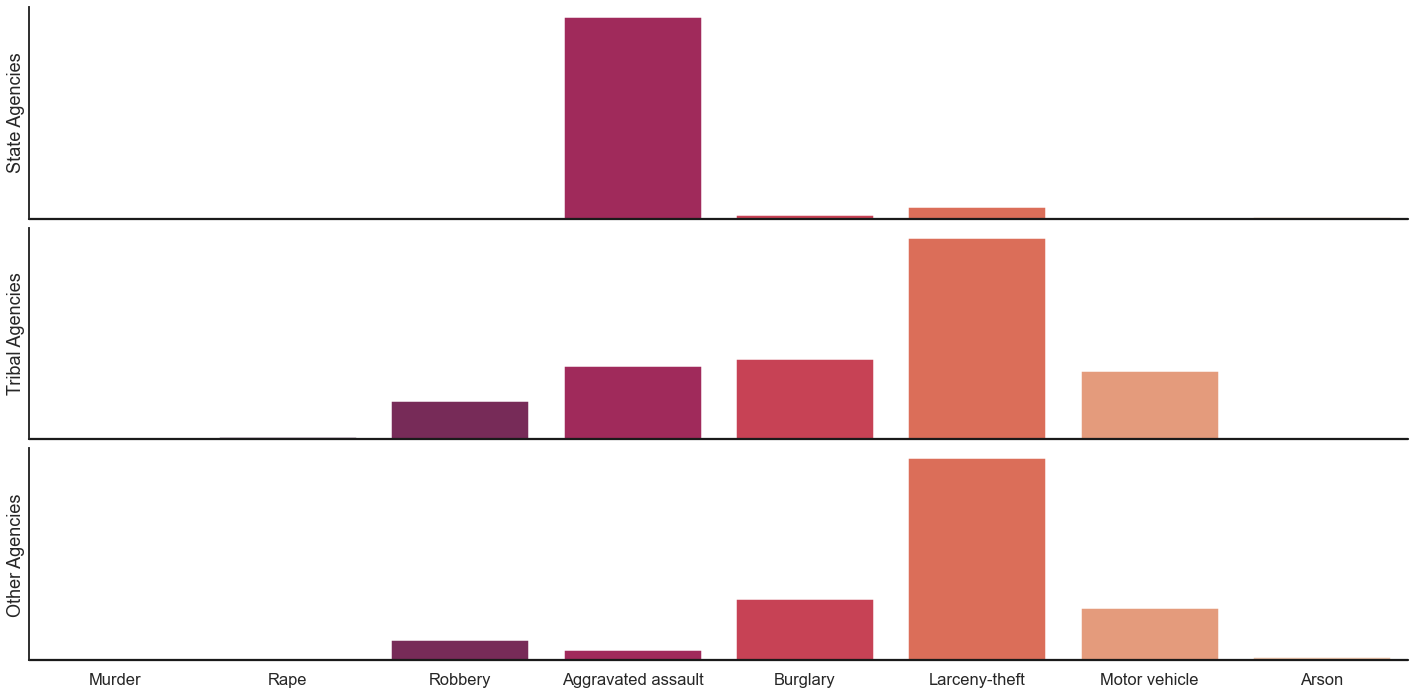

In [30]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 10), sharex=True)

# Generate data
x = indices 
y1 = hist_State
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("State Agencies")


y2 = hist_Tribal
sns.barplot(x=x, y=y2, palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Tribal Agencies")


y3 = hist_Other
sns.barplot(x=x, y=y3, palette="rocket", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Other Agencies")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=0.5)

'Tribal Agencies' and 'Other Agencies' have a relatively proportional distribution, where ' Larceny-theft' has the highest registration rates, followed by 'Burglary' and 'Motor vehicle', while in 'State Agencies', 'Aggravated assault' is without doubt the champion of records.

### 3.1.2- HEATMAP: Crimes/enforcement x type of agencies

In [31]:
totalcrime_enforcement = []
totalcrime_enforcement.append(df_agency[df_agency['State/Tribal/Other'] =='State Agencies']['total crime/enforcement'].mean())
totalcrime_enforcement.append(df_agency[df_agency['State/Tribal/Other'] =='Tribal Agencies']['total crime/enforcement'].mean())
totalcrime_enforcement.append(df_agency[df_agency['State/Tribal/Other'] =='Other Agencies']['total crime/enforcement'].mean())

Violentcrime_enforcement = []
Violentcrime_enforcement.append(df_agency[df_agency['State/Tribal/Other'] =='State Agencies']['Violent crime/enforcement'].mean())
Violentcrime_enforcement.append(df_agency[df_agency['State/Tribal/Other'] =='Tribal Agencies']['Violent crime/enforcement'].mean())
Violentcrime_enforcement.append(df_agency[df_agency['State/Tribal/Other'] =='Other Agencies']['Violent crime/enforcement'].mean())

Propertycrime_enforcement = []
Propertycrime_enforcement.append(df_agency[df_agency['State/Tribal/Other'] =='State Agencies']['Property crime/enforcement'].mean())
Propertycrime_enforcement.append(df_agency[df_agency['State/Tribal/Other'] =='Tribal Agencies']['Property crime/enforcement'].mean())
Propertycrime_enforcement.append(df_agency[df_agency['State/Tribal/Other'] =='Other Agencies']['Property crime/enforcement'].mean())

Propertycrime_enforcement

[0.04776831785345717, 1.7500822763980657, 4.3920004259013545]

In [32]:
x = ('State', 'Tribal', 'Other')
agency_heatmap = pd.DataFrame(index = x, columns=['total crime/enforcement','Violent crime/enforcement', 'Property crime/enforcement'])


agency_heatmap['total crime/enforcement'] = totalcrime_enforcement
agency_heatmap['Violent crime/enforcement'] = Violentcrime_enforcement
agency_heatmap['Property crime/enforcement'] = Propertycrime_enforcement

agency_heatmap

,total crime/enforcement,Violent crime/enforcement,Property crime/enforcement
State,0.383847,0.335483,0.047768
Tribal,2.594931,0.844849,1.750082
Other,4.945265,0.487941,4.392000


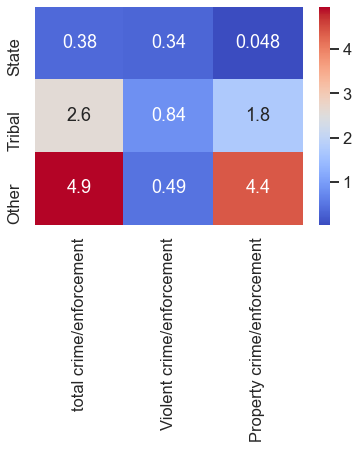

In [33]:
sns.heatmap(agency_heatmap, cmap= 'coolwarm', annot=True)

### 3.1.3- TABLE: 5 agencies with larger total crime / law employees ratio

In [34]:
df_agency.sort_values(['total crime/enforcement'], ascending=False, inplace=True)
df_agency.head()

,State/Tribal/Other,Agency,Unit/Office,Total law/enforcement/ employees,Total officers,Total civilians,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,total crime,total crime/enforcement,Violent crime/enforcement,Property crime/enforcement
14,Other Agencies,Stockton Unified School District,0,27,20,7,15.0,0.0,0.0,5.0,10.0,269.0,101.0,164.0,4.0,8.0,292.0,10.814815,0.555556,9.962963
4,Tribal Agencies,La Jolla Tribal,0,2,2,0,5.0,0.0,0.0,4.0,1.0,8.0,2.0,6.0,0.0,0.0,13.0,6.500000,2.500000,4.000000
15,Other Agencies,Twin Rivers Unified School District,0,27,22,5,24.0,0.0,1.0,6.0,17.0,148.0,74.0,66.0,8.0,0.0,172.0,6.370370,0.888889,5.481481
12,Other Agencies,San Bernardino Unified School District,0,72,23,49,69.0,0.0,3.0,60.0,6.0,362.0,134.0,201.0,27.0,3.0,434.0,6.027778,0.958333,5.027778
13,Other Agencies,San Francisco Bay Area Rapid Transit,Contra Costa County,285,197,88,49.0,0.0,2.0,37.0,10.0,886.0,0.0,641.0,245.0,7.0,942.0,3.305263,0.171930,3.108772


### 3.1.4- TABLE: 4 agencies with lower total crime / law employees ratio

A special attention to the first agency in the table that has a police force of 560 employees and a sum of 8 registered crimes.

In [35]:
df_agency.sort_values(['total crime/enforcement'], ascending=True, inplace=True)
df_agency[:4]

,State/Tribal/Other,Agency,Unit/Office,Total law/enforcement/ employees,Total officers,Total civilians,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,total crime,total crime/enforcement,Violent crime/enforcement,Property crime/enforcement
1,State Agencies,Department of Parks and Recreation,Capital,560,530,30,0.0,0.0,0.0,0.0,0.0,7.0,2.0,5.0,0.0,1.0,8.0,0.014286,0.000000,0.012500
3,Tribal Agencies,Coyote Valley Tribal,0,6,5,1,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.333333,0.333333,0.000000
2,State Agencies,Sonoma Developmental Center,0,17,7,10,6.0,0.0,0.0,0.0,6.0,2.0,0.0,2.0,0.0,0.0,8.0,0.470588,0.352941,0.117647
0,State Agencies,Coalinga State Hospital,0,228,210,18,149.0,0.0,0.0,0.0,149.0,3.0,1.0,2.0,0.0,0.0,152.0,0.666667,0.653509,0.013158


## 3.2- df_university

Created a ['total crime'] column by the sum of the listed crimes;

Created:
- ['crime per_capta'] column by the ratio between ['total crime'] and ['Student enrollment'].
- ['violent crime per_capta'] column by the ratio between ['Violent crime'] and ['Student enrollment'].
- ['property crime per_capta'] column by the ratio between ['Property crime'] and ['Student enrollment'].

In [36]:
df_university['total crime']= df_university['Violent crime']+df_university['Property crime']+df_university['Arson']
df_university['crime per_capta']= df_university['total crime']/df_university['Student enrollment']
df_university['violent crime per_capta']= df_university['Violent crime']/df_university['Student enrollment']
df_university['property crime per_capta']= df_university['Property crime']/df_university['Student enrollment']

df_university

,University/College,Campus,Total law/enforcement employees,Total officers,Total civilians,Student enrollment,enforcement per_capta,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),...,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,total crime,crime per_capta,violent crime per_capta,property crime per_capta
0,Allan Hancock College,NaN,10.0,5.0,5.0,11047.0,0.000905,0.0,0.0,0.0,...,0.0,21.0,2.0,18.0,1.0,0.0,21.0,0.001901,0.000000,0.001901
1,California State Polytechnic University,Pomona,27.0,19.0,8.0,23966.0,0.001127,6.0,0.0,4.0,...,1.0,173.0,5.0,150.0,18.0,1.0,180.0,0.007511,0.000250,0.007219
2,California State Polytechnic University,San Luis Obispo,33.0,17.0,16.0,20186.0,0.001635,3.0,0.0,2.0,...,1.0,163.0,7.0,149.0,7.0,1.0,167.0,0.008273,0.000149,0.008075
3,California State University,Bakersfield,21.0,14.0,7.0,8720.0,0.002408,1.0,0.0,0.0,...,1.0,78.0,12.0,65.0,1.0,0.0,79.0,0.009060,0.000115,0.008945
4,California State University,Channel Islands,28.0,14.0,14.0,5879.0,0.004763,2.0,0.0,0.0,...,1.0,62.0,7.0,54.0,1.0,0.0,64.0,0.010886,0.000340,0.010546
5,California State University,Chico,25.0,14.0,11.0,17287.0,0.001446,7.0,0.0,3.0,...,3.0,254.0,13.0,235.0,6.0,2.0,263.0,0.015214,0.000405,0.014693
6,California State University,Dominguez Hills,26.0,20.0,6.0,14687.0,0.001770,4.0,0.0,0.0,...,4.0,72.0,5.0,65.0,2.0,0.0,76.0,0.005175,0.000272,0.004902
7,California State University,East Bay,26.0,15.0,11.0,14823.0,0.001754,2.0,0.0,2.0,...,0.0,97.0,11.0,80.0,6.0,0.0,99.0,0.006679,0.000135,0.006544
8,California State University,Fresno,31.0,20.0,11.0,23179.0,0.001337,13.0,0.0,3.0,...,7.0,267.0,43.0,209.0,15.0,1.0,281.0,0.012123,0.000561,0.011519
9,California State University,Fullerton,37.0,27.0,10.0,38128.0,0.000970,8.0,0.0,3.0,...,4.0,248.0,22.0,218.0,8.0,0.0,256.0,0.006714,0.000210,0.006504


In [37]:
df_university['University/College'].value_counts()

California State University                  16
University of California                     11
California State Polytechnic University       2
Sonoma State University                       1
State Center Community College District       1
San Bernardino Community College              1
Allan Hancock College                         1
Marin Community College                       1
College of the Sequoias                       1
San Diego State University                    1
Foothill-De Anza College                      1
San Francisco State University                1
Riverside Community College                   1
El Camino College                             1
Contra Costa Community College                1
Ventura County Community College District     1
Humboldt State University                     1
Name: University/College, dtype: int64

### 3.2.1- BARPLOTS: quantity of each type of crime by type of universities

Based on the above details, we have grouped universities into 3 blocks:
- California State University- (16 campus)
- University of California- (11 campus)
- Others- (21 campus)

In order to make three barplots, we created three DataFrames with each type of universities, dividing the original df_university.

In [38]:
df_California_State_University = df_university[df_university['University/College']=='California State University']
df_University_of_California = df_university[df_university['University/College']=='University of California']
df_Others_Universities = df_university[(df_university['University/College']!='California State University') & (df_university['University/College']!='University of California')]

Using the function(crimes) we created lists containing the sum of each type of crime registered in each type of university.

In [39]:
hist_California_State_University=[]
for i in range (8,17) :    
        
        hist_California_State_University.append(crimes(i,df_California_State_University))
del hist_California_State_University[4] 
hist_California_State_University

[0.0, 41.0, 24.0, 69.0, 215.0, 2266.0, 101.0, 5.0]

In [40]:
hist_University_of_California=[]
for i in range (8,17) :    
        
        hist_University_of_California.append(crimes(i,df_University_of_California))
del hist_University_of_California[4]
hist_University_of_California

[0.0, 93.0, 61.0, 133.0, 390.0, 3967.0, 122.0, 13.0]

In [41]:
hist_Others_Universities=[]
for i in range (8,17) :    
        
        hist_Others_Universities.append(crimes(i,df_Others_Universities))
del hist_Others_Universities[4]
hist_Others_Universities

[0.0, 28.0, 18.0, 29.0, 194.0, 1880.0, 135.0, 6.0]

Barplot: set of vertical bar charts grouped by a categorical variable, indicating the sums of occurrence of each type of crime in the three types of universities.

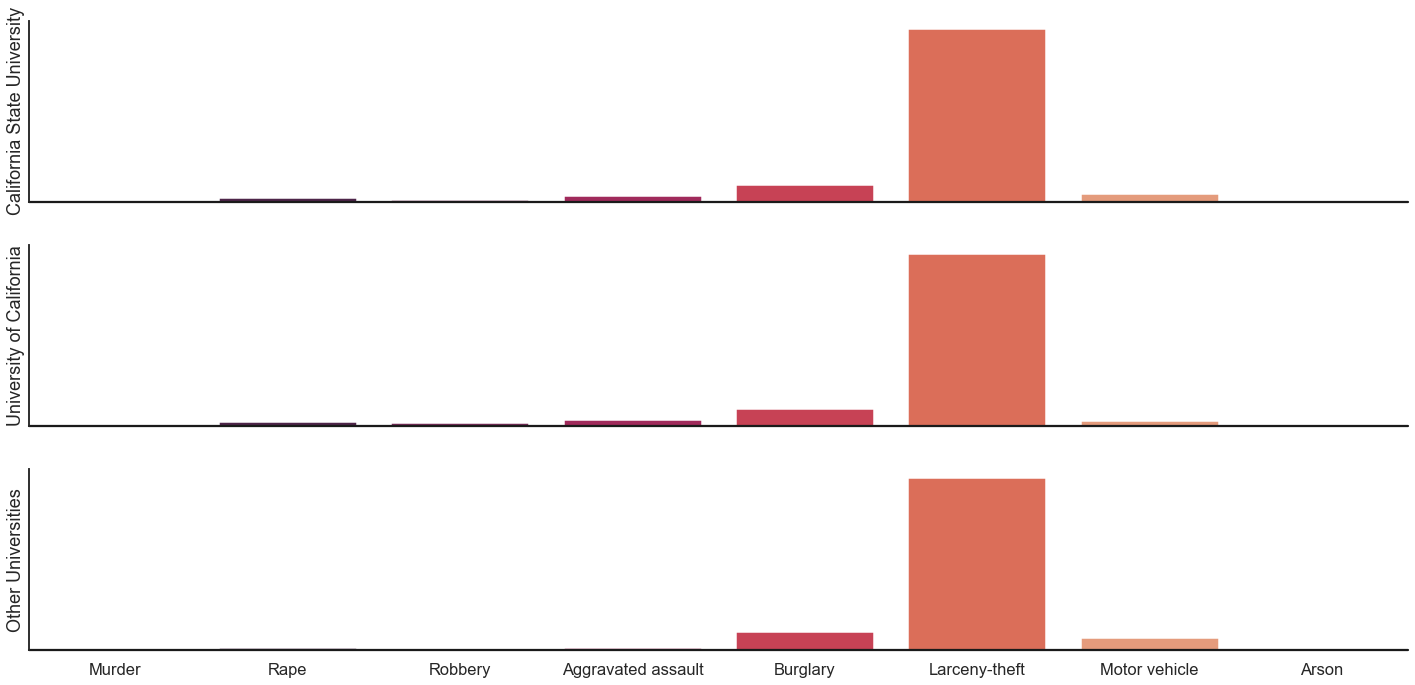

In [42]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 10), sharex=True)

# Generate some sequential data
x = indices 
y1 = hist_California_State_University
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("California State University")

# Center the data to make it diverging
y2 = hist_University_of_California
sns.barplot(x=x, y=y2, palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("University of California")

# Randomly reorder the data to make it qualitative
y3 = hist_Others_Universities
sns.barplot(x=x, y=y3, palette="rocket", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Other Universities")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=0.5)

In these barplots, we observe a proportional distribution among the universities, where Larceny-theft present the highest record rates, what is expected among the others crimes types.

### 3.2.2- PAIRPLOT: Students x Enforcement employees x Crimes x Violent Crimes, by type of universities

We created a column named 'University' appointing the 3 groups of universities in each DataFrame, in order to merge them in df_university_newcol, and use this one to pick some columns and creat df_university_new to plot the pairplot.

In [43]:
df_California_State_University.loc[:, 'University'] = 'California State University'
df_University_of_California.loc[:, 'University'] = 'University of California'
df_Others_Universities.loc[:, 'University'] = 'Others Universities'

In [44]:
df_university_newcol1 = pd.concat([df_California_State_University, df_University_of_California])
df_university = pd.concat([df_university_newcol1, df_Others_Universities])

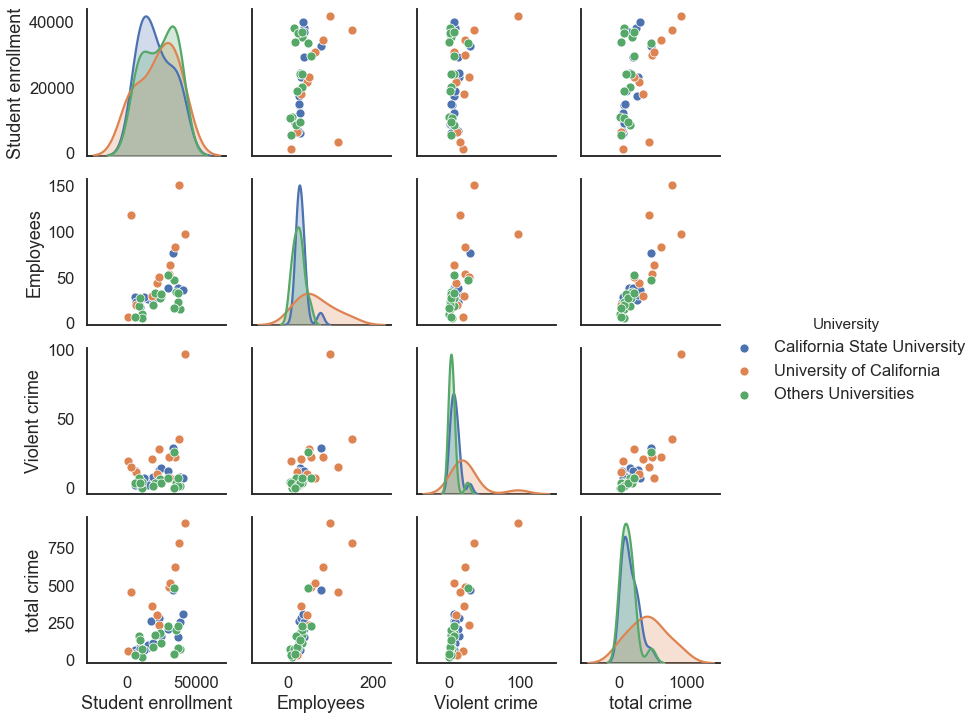

In [45]:
df_university_new = pd.DataFrame(columns=['Student enrollment','University','Employees', 'Violent crime', 'total crime'])

df_university_new['Student enrollment'] = df_university['Student enrollment']
df_university_new['University'] = df_university['University']
df_university_new['Employees'] = df_university['Total law/enforcement employees']
df_university_new['Violent crime'] = df_university['Violent crime']
df_university_new['total crime'] = df_university['total crime']

sns.pairplot(df_university_new, hue= 'University')

The universities in their 3 groups have a similar number of students, but we can see a difference in the number of police officers and the number of registered crimes.

### 3.2.3- LMPLOT: Students enrollment x total crime, by type of universities

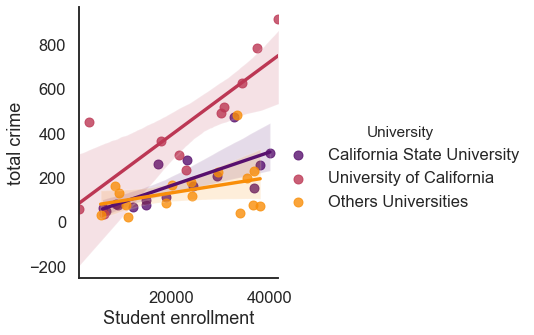

In [46]:
sns.lmplot(x='Student enrollment', y='total crime', data=df_university, hue='University', palette='inferno')

### 3.2.4- LMPLOT: Students enrollment x Violent crimes, by type of universities

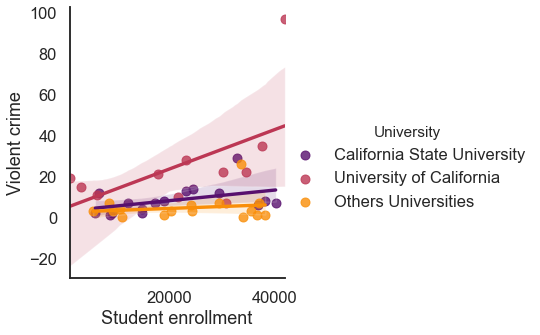

In [47]:
sns.lmplot(x='Student enrollment', y='Violent crime', data=df_university, hue='University', palette='inferno')

### 3.2.5- LMPLOT: Students enrollment x Property crimes, by type of universities

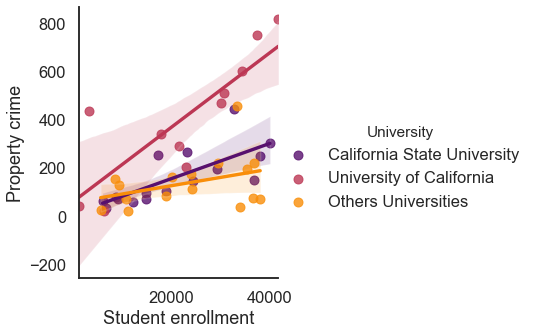

In [48]:
sns.lmplot(x='Student enrollment', y='Property crime', data=df_university, hue='University', palette='inferno')

### 3.2.6- LMPLOT: Total law/enforcement employees x Students enrollment, by type of universities

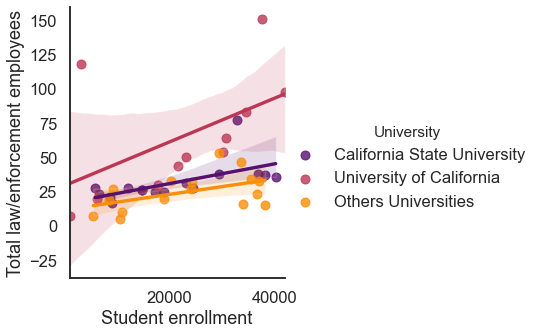

In [49]:
sns.lmplot(x='Student enrollment',y='Total law/enforcement employees', data=df_university, hue='University', palette='inferno')

In this graph we can see that the police contingent at the University of California is the largest among the three categories.

In [50]:
df_university[df_university['University'] =='California State University'].mean()

Total law/enforcement employees            31.500000
Total officers                             18.687500
Total civilians                            12.812500
Student enrollment                      20810.937500
enforcement per_capta                       0.001884
Violent crime                               8.375000
Murder and nonnegligent manslaughter        0.000000
Rape (revised definition)                   2.562500
Robbery                                     1.500000
Aggravated assault                          4.312500
Property crime                            161.375000
Burglary                                   13.437500
Larceny-theft                             141.625000
Motor vehicle theft                         6.312500
Arson                                       0.312500
total crime                               170.062500
crime per_capta                             0.008277
violent crime per_capta                     0.000454
property crime per_capta                    0.

In [51]:
df_university[df_university['University'] =='University of California'].mean()

Total law/enforcement employees            65.363636
Total officers                             35.272727
Total civilians                            30.090909
Student enrollment                      22503.090909
enforcement per_capta                       0.005994
Violent crime                              26.090909
Murder and nonnegligent manslaughter        0.000000
Rape (revised definition)                   8.454545
Robbery                                     5.545455
Aggravated assault                         12.090909
Property crime                            407.181818
Burglary                                   35.454545
Larceny-theft                             360.636364
Motor vehicle theft                        11.090909
Arson                                       1.181818
total crime                               434.454545
crime per_capta                             0.031403
violent crime per_capta                     0.003012
property crime per_capta                    0.

In [52]:
df_university[df_university['University'] =='Others Universities'].mean()

Total law/enforcement employees            25.062500
Total officers                             14.687500
Total civilians                            10.375000
Student enrollment                      23516.625000
enforcement per_capta                       0.001218
Violent crime                               4.687500
Murder and nonnegligent manslaughter        0.000000
Rape (revised definition)                   1.750000
Robbery                                     1.125000
Aggravated assault                          1.812500
Property crime                            138.062500
Burglary                                   12.125000
Larceny-theft                             117.500000
Motor vehicle theft                         8.437500
Arson                                       0.375000
total crime                               143.125000
crime per_capta                             0.006974
violent crime per_capta                     0.000249
property crime per_capta                    0.

### 3.2.7- BOXPLOT: quantity of crimes by syzes of universities

Based on the above details, we have grouped universities into 4 blocks by sizes:

- Small universities- (11 campus)
- Medium universities- (11 campus)
- Large universities- (10 campus)
- Huge universities- (11 campus)

In [53]:
data = df_university['Student enrollment']
bins = [0, 0.25, 0.5, 0.75, 1.0]

pd.qcut(data,bins).head()

sizes = ['Small','Medium','Large','Huge']
df_university['Size'] = pd.qcut(data,bins,labels=sizes)

pd.value_counts(df_university['Size']).sort_index()

Small     11
Medium    11
Large     10
Huge      11
Name: Size, dtype: int64

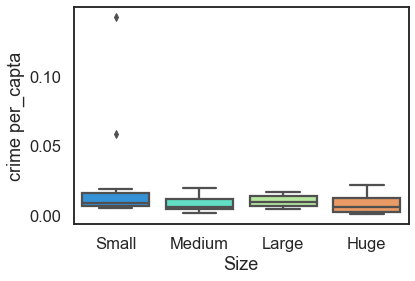

In [54]:
sns.boxplot(x='Size', y='crime per_capta', data=df_university, palette='rainbow')

### 3.2.8- TABLES: Analazing the 2 Universities with the higher crimes per capta

In the past graph we could see two Campus that have a higher overall rate of crime per capta. In order to analyse the reason we will see others informations about this two Campus.

In [55]:
df_uni = df_university.sort_values('crime per_capta',ascending=False).iloc[0:2]
df_uni['total crime/enforcement'] = df_uni['total crime']/df_uni['Total law/enforcement employees']
df_uni

,University/College,Campus,Total law/enforcement employees,Total officers,Total civilians,Student enrollment,enforcement per_capta,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),...,Larceny-theft,Motor vehicle theft,Arson,total crime,crime per_capta,violent crime per_capta,property crime per_capta,University,Size,total crime/enforcement
39,University of California,San Francisco,118.0,45.0,73.0,3170.0,0.037224,15.0,0.0,1.0,...,387.0,16.0,0.0,452.0,0.142587,0.004732,0.137855,University of California,Small,3.830508
33,University of California,Hastings College of Law,7.0,7.0,0.0,1003.0,0.006979,19.0,0.0,1.0,...,36.0,0.0,0.0,59.0,0.058824,0.018943,0.039880,University of California,Small,8.428571


In [56]:
df_university.sort_values('enforcement per_capta',ascending=False).iloc[0:2]


,University/College,Campus,Total law/enforcement employees,Total officers,Total civilians,Student enrollment,enforcement per_capta,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),...,Burglary,Larceny-theft,Motor vehicle theft,Arson,total crime,crime per_capta,violent crime per_capta,property crime per_capta,University,Size
39,University of California,San Francisco,118.0,45.0,73.0,3170.0,0.037224,15.0,0.0,1.0,...,34.0,387.0,16.0,0.0,452.0,0.142587,0.004732,0.137855,University of California,Small
33,University of California,Hastings College of Law,7.0,7.0,0.0,1003.0,0.006979,19.0,0.0,1.0,...,4.0,36.0,0.0,0.0,59.0,0.058824,0.018943,0.039880,University of California,Small


Analyzing the tables, we can conclude that the two campuses have the largest number of police contingents per student, however this is not enough to contain the occurrences. In addition, UC San Francisco has a 96.68% rate of property crimes, while at UC Hastings College of Law, 67.8% of crimes are property and 32.2% are violent crimes. Featuring a different nature in the criminality of both campuses.

### 3.2.9- TABLE: 5 Universities with higher crimes per capta

In [57]:
df_university.sort_values(['crime per_capta'], ascending=False, inplace=True)
df_university.head()

,University/College,Campus,Total law/enforcement employees,Total officers,Total civilians,Student enrollment,enforcement per_capta,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),...,Burglary,Larceny-theft,Motor vehicle theft,Arson,total crime,crime per_capta,violent crime per_capta,property crime per_capta,University,Size
39,University of California,San Francisco,118.0,45.0,73.0,3170.0,0.037224,15.0,0.0,1.0,...,34.0,387.0,16.0,0.0,452.0,0.142587,0.004732,0.137855,University of California,Small
33,University of California,Hastings College of Law,7.0,7.0,0.0,1003.0,0.006979,19.0,0.0,1.0,...,4.0,36.0,0.0,0.0,59.0,0.058824,0.018943,0.039880,University of California,Small
35,University of California,Los Angeles,98.0,60.0,38.0,41845.0,0.002342,97.0,0.0,27.0,...,136.0,663.0,18.0,2.0,916.0,0.021890,0.002318,0.019524,University of California,Huge
31,University of California,Berkeley,151.0,65.0,86.0,37565.0,0.004020,35.0,0.0,9.0,...,43.0,688.0,18.0,1.0,785.0,0.020897,0.000932,0.019939,University of California,Huge
41,University of California,Santa Cruz,30.0,18.0,12.0,17866.0,0.001679,21.0,0.0,11.0,...,26.0,304.0,11.0,1.0,363.0,0.020318,0.001175,0.019087,University of California,Medium


### 3.2.10- TABLE: 5 Universities with lower crimes per capta

In [58]:
df_university.sort_values(['crime per_capta'], ascending=True, inplace=True)
df_university.head()

,University/College,Campus,Total law/enforcement employees,Total officers,Total civilians,Student enrollment,enforcement per_capta,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),...,Burglary,Larceny-theft,Motor vehicle theft,Arson,total crime,crime per_capta,violent crime per_capta,property crime per_capta,University,Size
42,Ventura County Community College District,NaN,16.0,15.0,1.0,33956.0,0.000471,0.0,0.0,0.0,...,0.0,39.0,0.0,0.0,39.0,0.001149,0.000000,0.001149,Others Universities,Huge
0,Allan Hancock College,NaN,10.0,5.0,5.0,11047.0,0.000905,0.0,0.0,0.0,...,2.0,18.0,1.0,0.0,21.0,0.001901,0.000000,0.001901,Others Universities,Medium
22,Foothill-De Anza College,NaN,15.0,10.0,5.0,38134.0,0.000393,1.0,0.0,0.0,...,5.0,64.0,3.0,0.0,73.0,0.001914,0.000026,0.001888,Others Universities,Huge
25,Riverside Community College,NaN,23.0,18.0,5.0,36582.0,0.000629,1.0,0.0,0.0,...,6.0,57.0,11.0,1.0,76.0,0.002078,0.000027,0.002023,Others Universities,Huge
10,California State University,Long Beach,38.0,24.0,14.0,36809.0,0.001032,6.0,0.0,4.0,...,12.0,129.0,7.0,0.0,154.0,0.004184,0.000163,0.004021,California State University,Huge


As shown in the graphs and confirmed in the table, the most violent Universities are located on the campuses of the University of California.

## 3.3- df_city

In [59]:
coord = pd.read_excel('coordenadas.xlsx',sheet_name='Planilha4')
coord.columns = ['City', 'Lat', 'Lon']

df_city = pd.merge(df_city,coord)

df_city['total crime']= df_city['Violent crime']+df_city['Property crime']+df_city['Arson']
df_city['crime per_capta']= df_city['total crime']/df_city['Population']
df_city['Violent crime per_capta']= df_city['Violent crime']/df_city['Population']
df_city['Property crime per_capta']= df_city['Property crime']/df_city['Population']

df_city

,City,Population,Total law\renforcement \remployees,Total \rofficers,Total \rcivilians,enforcement per_capta,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,...,Burglary,Larceny-theft,Motor vehicle theft,Arson,Lat,Lon,total crime,crime per_capta,Violent crime per_capta,Property crime per_capta
0,Alameda,78613,112,83,29,0.001425,148.0,2,7.0,61.0,...,228.0,1245.0,346.0,18.0,37.76,-122.27,1985.0,0.025250,0.001883,0.023139
1,Albany,19723,30,23,7,0.001521,34.0,1,6.0,16.0,...,95.0,447.0,63.0,0.0,37.88,-122.33,639.0,0.032399,0.001724,0.030675
2,Alhambra,86175,128,85,43,0.001485,168.0,1,13.0,74.0,...,305.0,1413.0,211.0,6.0,34.08,-118.14,2103.0,0.024404,0.001950,0.022385
3,Alturas,2566,6,5,1,0.002338,35.0,0,13.0,2.0,...,9.0,48.0,4.0,4.0,41.49,-120.55,100.0,0.038971,0.013640,0.023772
4,Anaheim,349471,577,399,178,0.001651,1271.0,18,129.0,439.0,...,1476.0,6893.0,1669.0,28.0,33.84,-117.86,11337.0,0.032440,0.003637,0.028723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,Willows,6074,9,8,1,0.001482,40.0,0,5.0,4.0,...,24.0,148.0,18.0,2.0,39.51,-122.20,232.0,0.038196,0.006585,0.031281
300,Winters,7023,13,11,2,0.001851,24.0,0,2.0,1.0,...,17.0,80.0,14.0,1.0,38.53,-121.98,136.0,0.019365,0.003417,0.015805
301,Woodlake,7751,13,12,1,0.001677,39.0,2,1.0,3.0,...,32.0,87.0,15.0,2.0,36.41,-119.10,175.0,0.022578,0.005032,0.017288
302,Woodland,57911,77,62,15,0.001330,265.0,1,16.0,51.0,...,326.0,1230.0,242.0,15.0,38.67,-121.75,2078.0,0.035883,0.004576,0.031048


### 3.3.1- BARPLOTS: quantity of each type of crime by the size of the Cities

Based on the above details, we have grouped the cities into 4 blocks:

- Small_Cities with: population < 10.000 residents- (47 cities)
- Medium_Cities with: 10.000 < population < 50.000 residents- (122 cities)
- Large_Cities with: 50.000 < population < 100.000 residents- (64 cities)
- Huge_Cities with: population > 100.000 residents- (58 cities)

In order to make four barplots, we created four DataFrames with each syze of city, dividing the original df_city.

In [60]:
df_Small_Cities = df_city[(df_city['Population'] < 10000)]
df_Medium_Cities = df_city[(df_city['Population']>10000) & (df_city['Population'] < 50000)]
df_Large_Cities = df_city[(df_city['Population']>50000) & (df_city['Population'] < 100000)]
df_Huge_Cities = df_city[(df_city['Population']>100000)]

Using the function(city) we created lists containing the sum of each type of crime registered in each syze of city.

In [62]:
hist_small=[]
for i in range (7,16) :
        hist_small.append(crimes(i,df_Small_Cities))
del hist_small[4]
hist_small

[14.0, 119.0, 142.0, 958.0, 1542.0, 4441.0, 686.0, 53.0]

In [63]:
hist_medium=[]
for i in range (7,16) :
        hist_medium.append(crimes(i,df_Medium_Cities))
del hist_medium[4]
hist_medium

[112.0, 930.0, 2788.0, 6923.0, 18472.0, 58262.0, 11567.0, 640.0]

In [64]:
hist_big=[]
for i in range (7,16) :
        hist_big.append(crimes(i,df_Large_Cities))
del hist_big[4]
hist_big

[142.0, 1396.0, 5112.0, 10140.0, 23790.0, 94098.0, 20576.0, 906.0]

In [65]:
hist_giga=[]
for i in range (7,16) :
        hist_giga.append(crimes(i,df_Huge_Cities))
del hist_giga[4]
hist_giga

[1016.0, 6899.0, 33317.0, 49880.0, 90678.0, 335015.0, 91133.0, 3801.0]

Barplot: set of vertical bar charts grouped by a categorical variable, indicating the sums of occurrence of each type of crime in the four syzes of cities.

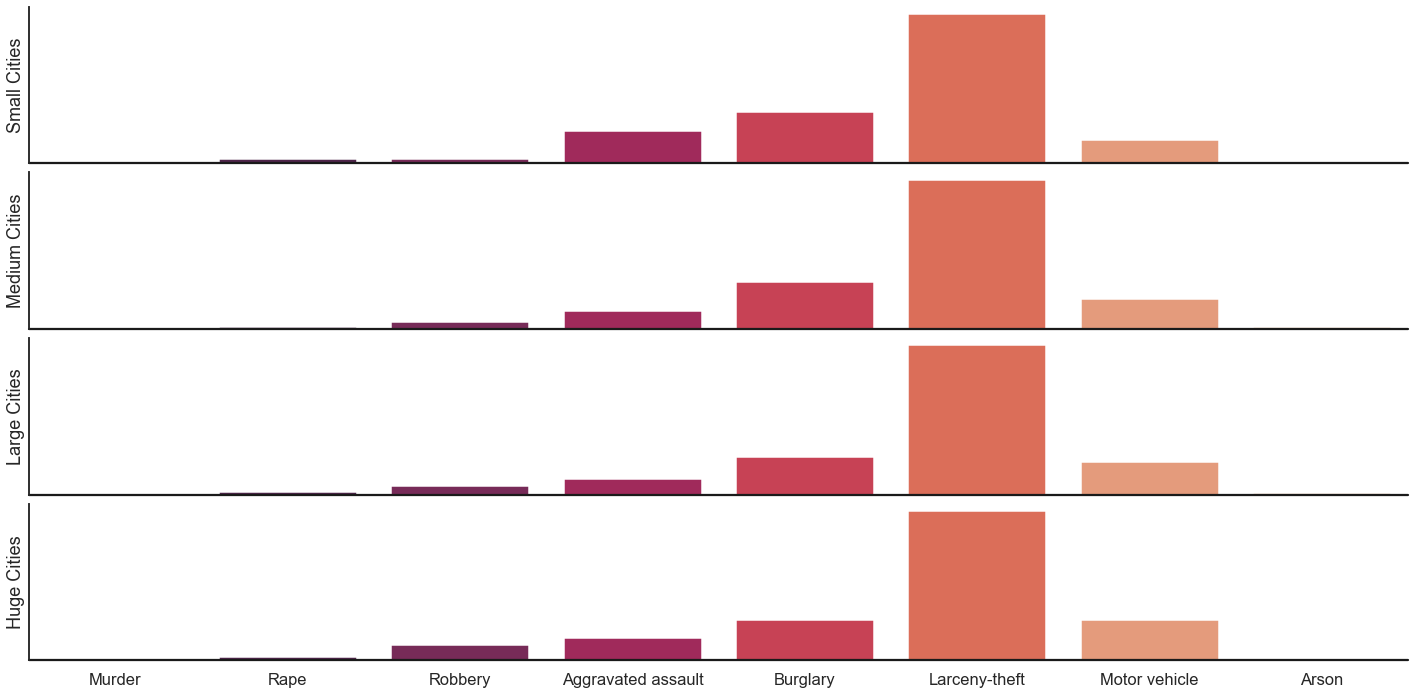

In [66]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 10), sharex=True)

# Generate some sequential data
x = indices 
y1 = hist_small
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Small Cities")

# Center the data to make it diverging
y2 = hist_medium
sns.barplot(x=x, y=y2, palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Medium Cities")

# Randomly reorder the data to make it qualitative
y3 = hist_big
sns.barplot(x=x, y=y3, palette="rocket", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Large Cities")

y4 = hist_giga
sns.barplot(x=x, y=y4, palette="rocket", ax=ax4)
ax4.axhline(0, color="k", clip_on=False)
ax4.set_ylabel("Huge Cities")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=0.5)

### 3.3.2- BASEMAP: Distribution of Violence among the Population in each City

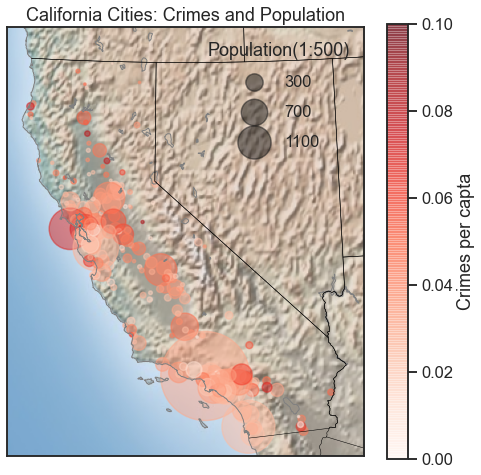

In [67]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='black')
m.drawstates(color='black')

# 2. scatter city data, with color reflecting population
# and size reflecting area
lon = df_city['Lon'].values
lat = df_city['Lat'].values
crimes_ratio = df_city['crime per_capta'].values
population = df_city['Population'].values

m.scatter(lon, lat, latlon=True,
          c=crimes_ratio, s=(population)/500,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'Crimes per capta')
plt.clim(0.0, 0.1)

plt.title("California Cities: Crimes and Population")

for population in [300, 700, 1100]:
    plt.scatter([], [], c='k', alpha=0.5, s=population, label=str(population))
plt.legend(scatterpoints = 1, frameon= False, labelspacing = 0.9, title = 'Population(1:500)')

The cities with the highest crime rate are not the most populous, contrary to expectations. The highest crime rate is concentrated between medium and small cities.

### 3.3.3- BOXPLOT: City Size x Crime per capta

In [68]:
df_Small_Cities.loc[:, 'City Size'] = 'Small'
df_Medium_Cities.loc[:, 'City Size'] = 'Medium'
df_Large_Cities.loc[:, 'City Size'] = 'Large'
df_Huge_Cities.loc[:, 'City Size'] = 'Huge'

In [69]:
df_city_newcol1 = pd.concat([df_Small_Cities, df_Medium_Cities])
df_city_newcol2 = pd.concat([df_city_newcol1, df_Large_Cities])
df_city_newcol = pd.concat([df_city_newcol2, df_Huge_Cities])

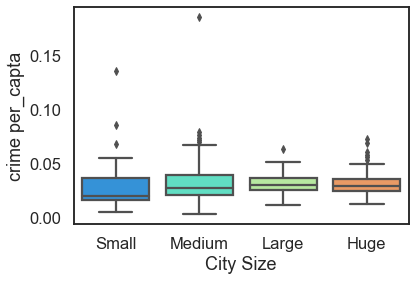

In [70]:
sns.boxplot(x='City Size', y='crime per_capta', data=df_city_newcol, palette='rainbow')

### 3.3.4- HEATMAP: Class of crimes/population x type of Cities

In [71]:
totalcrime_per_capta = []
totalcrime_per_capta.append(df_city_newcol[df_city_newcol['City Size'] =='Small']['crime per_capta'].mean())
totalcrime_per_capta.append(df_city_newcol[df_city_newcol['City Size'] =='Medium']['crime per_capta'].mean())
totalcrime_per_capta.append(df_city_newcol[df_city_newcol['City Size'] =='Large']['crime per_capta'].mean())
totalcrime_per_capta.append(df_city_newcol[df_city_newcol['City Size'] =='Huge']['crime per_capta'].mean())

Violentcrime_per_capta = []
Violentcrime_per_capta.append(df_city_newcol[df_city_newcol['City Size'] =='Small']['Violent crime per_capta'].mean())
Violentcrime_per_capta.append(df_city_newcol[df_city_newcol['City Size'] =='Medium']['Violent crime per_capta'].mean())
Violentcrime_per_capta.append(df_city_newcol[df_city_newcol['City Size'] =='Large']['Violent crime per_capta'].mean())
Violentcrime_per_capta.append(df_city_newcol[df_city_newcol['City Size'] =='Huge']['Violent crime per_capta'].mean())

Propertycrime_per_capta = []
Propertycrime_per_capta.append(df_city_newcol[df_city_newcol['City Size'] =='Small']['Property crime per_capta'].mean())
Propertycrime_per_capta.append(df_city_newcol[df_city_newcol['City Size'] =='Medium']['Property crime per_capta'].mean())
Propertycrime_per_capta.append(df_city_newcol[df_city_newcol['City Size'] =='Large']['Property crime per_capta'].mean())
Propertycrime_per_capta.append(df_city_newcol[df_city_newcol['City Size'] =='Huge']['Property crime per_capta'].mean())

In [72]:
City_Size = ['Small','Medium','Large','Huge']

df_city_new = pd.DataFrame(index = City_Size, columns=['totalcrime_per_capta','Violentcrime_per_capta','Propertycrime_per_capta'])

df_city_new['totalcrime_per_capta'] = totalcrime_per_capta
df_city_new['Violentcrime_per_capta'] = Violentcrime_per_capta
df_city_new['Propertycrime_per_capta'] = Propertycrime_per_capta

df_city_new

,totalcrime_per_capta,Violentcrime_per_capta,Propertycrime_per_capta
Small,0.028103,0.004452,0.023438
Medium,0.033242,0.003670,0.029356
Large,0.032006,0.003434,0.028393
Huge,0.032573,0.004149,0.028257


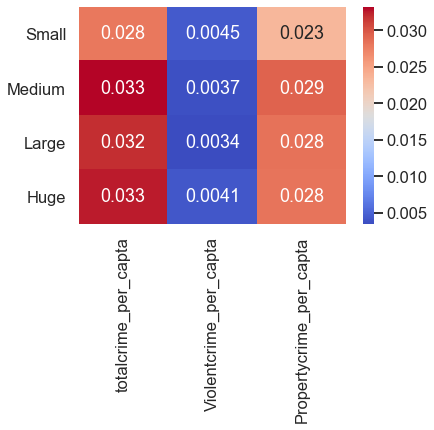

In [73]:
sns.heatmap(df_city_new, cmap= 'coolwarm', annot=True)

### 3.3.5- TABLE: 5 cities with higher crimes per capta

In [74]:
df_city_newcol.sort_values(['crime per_capta'], ascending=False, inplace=True)
df_city_newcol.head()

,City,Population,Total law\renforcement \remployees,Total \rofficers,Total \rcivilians,enforcement per_capta,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,...,Larceny-theft,Motor vehicle theft,Arson,Lat,Lon,total crime,crime per_capta,Violent crime per_capta,Property crime per_capta,City Size
85,Emeryville,11549,49,34,15,0.004243,153.0,1,3.0,74.0,...,1729.0,148.0,1.0,37.84,-122.30,2151.0,0.186250,0.013248,0.172915,Medium
134,Irwindale,1433,33,25,8,0.023029,27.0,1,0.0,8.0,...,109.0,19.0,2.0,34.11,-117.96,195.0,0.136078,0.018842,0.115841,Small
264,Sonora,4779,19,13,6,0.003976,42.0,0,5.0,10.0,...,267.0,18.0,4.0,37.98,-120.38,411.0,0.086001,0.008788,0.076376,Small
214,Red Bluff,14045,32,22,10,0.002278,118.0,0,13.0,25.0,...,675.0,99.0,3.0,40.17,-122.24,1116.0,0.079459,0.008402,0.070844,Medium
192,Oroville,16289,45,24,21,0.002763,108.0,0,17.0,31.0,...,710.0,169.0,4.0,39.50,-121.57,1255.0,0.077046,0.006630,0.070170,Medium


### 3.3.6- TABLE: 4 cities with lower crimes per capta

In [75]:
df_city_newcol.sort_values(['crime per_capta'], ascending=True, inplace=True)
df_city_newcol[:4]

,City,Population,Total law\renforcement \remployees,Total \rofficers,Total \rcivilians,enforcement per_capta,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,...,Larceny-theft,Motor vehicle theft,Arson,Lat,Lon,total crime,crime per_capta,Violent crime per_capta,Property crime per_capta,City Size
129,Imperial,17338,18,15,3,0.001038,5.0,0,1.0,0.0,...,47.0,5.0,0.0,32.84,-115.57,59.0,0.003403,0.000288,0.003115,Medium
293,Westmorland,2278,5,5,0,0.002195,5.0,0,0.0,3.0,...,2.0,0.0,0.0,33.04,-115.62,12.0,0.005268,0.002195,0.003073,Small
88,Etna,705,3,3,0,0.004255,1.0,0,0.0,0.0,...,3.0,1.0,0.0,41.46,-122.89,5.0,0.007092,0.001418,0.005674,Small
269,Stallion Springs,2611,3,3,0,0.001149,3.0,0,0.0,0.0,...,13.0,2.0,0.0,35.09,-118.65,19.0,0.007277,0.001149,0.006128,Small


## 3.4- df_county

In [76]:
df_county['Metropolitan/Nonmetropolitan'].value_counts()

Metropolitan Counties       35
Nonmetropolitan Counties    21
Name: Metropolitan/Nonmetropolitan, dtype: int64

In [77]:
df_county['total crime']= df_county['Violent crime']+df_county['Property crime']+df_county['Arson']
df_county.head()

,Metropolitan/Nonmetropolitan,County,Total law/\renforcement /\remployees,Total\rofficers,Total\rcivilians,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,total crime
0,Metropolitan Counties,Alameda,1560,978,582,510.0,6.0,13.0,177.0,314.0,2077.0,463.0,985.0,629.0,11.0,2598.0
1,Metropolitan Counties,Butte,288,101,187,155.0,4.0,20.0,14.0,117.0,1422.0,708.0,693.0,21.0,0.0,1577.0
2,Metropolitan Counties,Contra Costa,936,610,326,426.0,14.0,24.0,153.0,235.0,2013.0,660.0,1332.0,21.0,18.0,2457.0
3,Metropolitan Counties,El Dorado,349,164,185,252.0,9.0,46.0,32.0,165.0,2031.0,577.0,1412.0,42.0,4.0,2287.0
4,Metropolitan Counties,Fresno,1043,406,637,962.0,8.0,32.0,112.0,810.0,3810.0,1398.0,1838.0,574.0,145.0,4917.0


### 3.4.1- BARPLOTS: quantity of each type of crime by the County ( Metropolitan / Nonmetropolitan )

Based on the above details, we have grouped the counties into 2 blocks:

- Metropolitan- (35 counties)
- Nonmetropolitan- (21 counties)

In order to make two barplots, we created two DataFrames with each type of county, dividing the original df_county.

In [78]:
df_county_Metropolitan = df_county[df_county['Metropolitan/Nonmetropolitan']=='Metropolitan Counties']
df_county_Nonmetropolitan = df_county[df_county['Metropolitan/Nonmetropolitan']=='Nonmetropolitan Counties']

In [79]:
hist_Metropolitan=[]
for i in range (6,15) : 
        
        hist_Metropolitan.append(city(i,df_county_Metropolitan))
del hist_Metropolitan[4]
hist_Metropolitan

[323.0, 1570.0, 4424.0, 16266.0, 28475.0, 55753.0, 12375.0, 1095.0]

In [80]:
hist_Nonmetropolitan=[]
for i in range (6,15) : 
        
        hist_Nonmetropolitan.append(city(i,df_county_Nonmetropolitan))
del hist_Nonmetropolitan[4]
hist_Nonmetropolitan

[31.0, 247.0, 170.0, 1580.0, 3155.0, 3548.0, 119.0, 75.0]

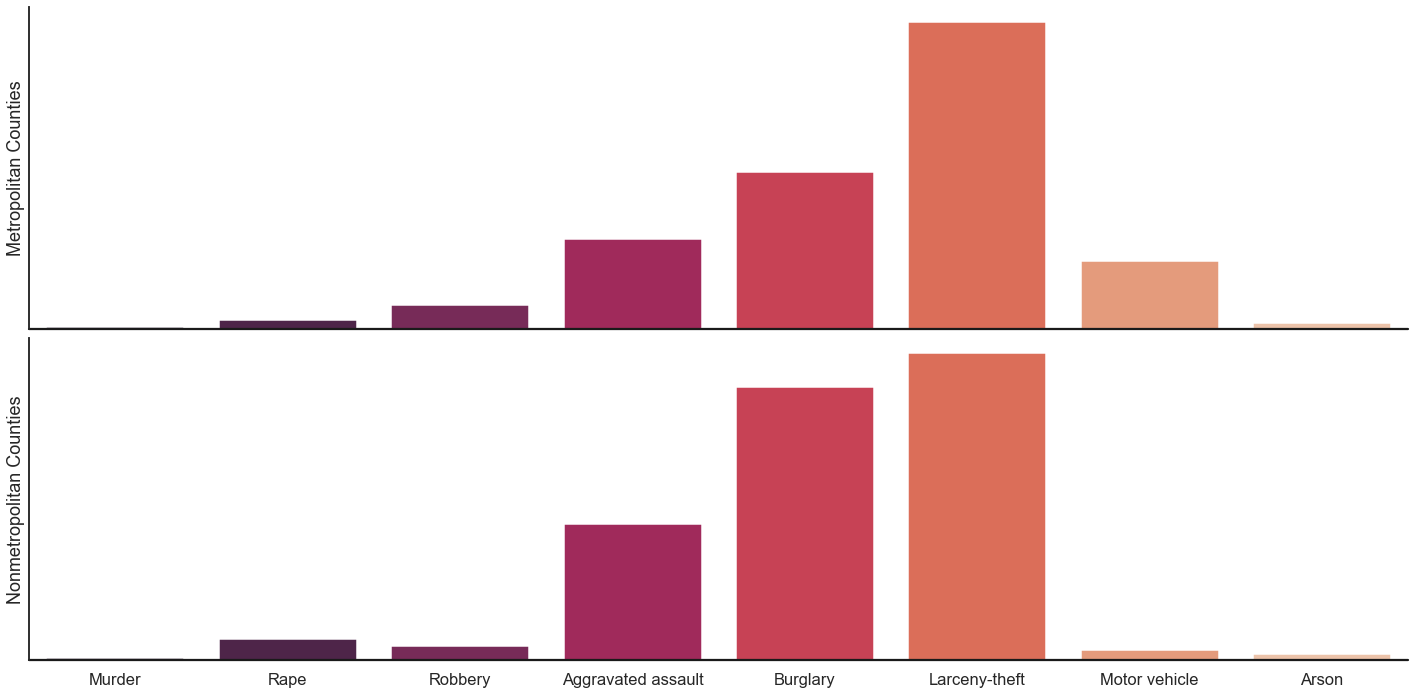

In [81]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# Generate some sequential data
x = indices 
y1 = hist_Metropolitan
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Metropolitan Counties")

# Center the data to make it diverging
y2 = hist_Nonmetropolitan
sns.barplot(x=x, y=y2, palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Nonmetropolitan Counties")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=0.5)

### 3.4.2- TABLE: 5 Counties with larger total crime / law employees ratio

In [82]:
df_county['total crime/enforcement']= df_county['total crime']/df_county['Total law/\renforcement /\remployees']
df_county.sort_values(['total crime/enforcement'], ascending= False, inplace=True)
df_county.head()

,Metropolitan/Nonmetropolitan,County,Total law/\renforcement /\remployees,Total\rofficers,Total\rcivilians,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,total crime,total crime/enforcement
9,Metropolitan Counties,Madera,104,75,29,334.0,1.0,18.0,26.0,289.0,1252.0,556.0,686.0,10.0,4.0,1590.0,15.288462
6,Metropolitan Counties,Kern,1181,868,313,2235.0,31.0,157.0,360.0,1687.0,9903.0,3243.0,4777.0,1883.0,300.0,12438.0,10.531753
11,Metropolitan Counties,Merced,210,82,128,432.0,10.0,20.0,30.0,372.0,1605.0,596.0,955.0,54.0,10.0,2047.0,9.747619
39,Nonmetropolitan Counties,Del Norte,53,25,28,101.0,1.0,21.0,13.0,66.0,380.0,194.0,182.0,4.0,13.0,494.0,9.320755
34,Metropolitan Counties,Yuba,168,126,42,227.0,3.0,19.0,40.0,165.0,1223.0,417.0,799.0,7.0,11.0,1461.0,8.696429


### 3.4.3- TABLE: 5 Counties with lower total crime / law employees ratio

In [83]:
df_county.sort_values(['total crime/enforcement'], ascending= True, inplace=True)
df_county.head()

,Metropolitan/Nonmetropolitan,County,Total law/\renforcement /\remployees,Total\rofficers,Total\rcivilians,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,total crime,total crime/enforcement
14,Metropolitan Counties,Orange,3602,1778,1824,213.0,2.0,12.0,28.0,171.0,1265.0,244.0,879.0,142.0,11.0,1489.0,0.413381
32,Metropolitan Counties,Ventura,1242,732,510,169.0,3.0,32.0,16.0,118.0,849.0,236.0,530.0,83.0,15.0,1033.0,0.831723
25,Metropolitan Counties,Santa Clara,1613,1206,407,232.0,4.0,36.0,24.0,168.0,1358.0,261.0,899.0,198.0,3.0,1593.0,0.987601
28,Metropolitan Counties,Solano,481,123,358,101.0,3.0,7.0,14.0,77.0,404.0,186.0,176.0,42.0,9.0,514.0,1.068607
8,Metropolitan Counties,Los Angeles,16582,9146,7436,5173.0,98.0,304.0,1212.0,3559.0,16301.0,3739.0,8359.0,4203.0,215.0,21689.0,1.307985


In [84]:
df_county['total crime/enforcement'].mean()

4.481680868409215

# CONCLUSION

As explained above, we can make the following conclusions about California State based on the four sample groups:

### Agencies:

After the statistical analysis of the data of the Agencies, the types of crimes most registered by agencies were:

- State Agencies = Aggravated assault - 92.2%
- Tribal Agencies = Larceny-theft - 43.4%
- Other Agencies = Larceny-theft - 57.5%

Another factor pointed out was the distribution of the workforce, since the agencies have an average of:
 
- State Agencies = 0.38 crimes per enforcement,
- Tribal Agencies = 2.5 crimes per enforcement,
- Other Agencies = 4.9 crimes per enforcement


### Universities:

Regardless of the university or campus, the most frequent crime recorded was Larceny-theft, with an average occurrence of 82.9% in relation to the total number of crimes.

Data analysis showed a high crime rate on the University of California campuses.

- Others Universities = 0.006974 crime per student
- University of California = 0.031403 crime per student
- California State University = 0.008277 crime per student

Especially small campuses:

- University of California - San Francisco
- University of California - Hastings College of Law

Analyzing the tables, we could conclude that the two campuses have the largest number of police contingents per student, however this is not enough to contain the occurrences. In addition, UC San Francisco has a 96.68% rate of property crimes, while at UC Hastings College of Law, 67.8% of crimes are property and 32.2% are violent crimes. Featuring a different nature in the criminality of both campuses. This can be justified by the location of both campuses.
 
A suggestion is a more detailed analysis of the cases such as: size and isolation of the campus, lighting, social situation around the campus, times with the highest occurrence rate, etc., in order to take action in both fields to reduce this high rate. criminal.


### Cities:

In the four types of cities distributed by population size, the distribution of the proportional frequency of the types of crimes due to the total number of crimes was practically equivalent, where the 5 most frequent crimes were:

- Larceny-theft - 56.2%
- Burglary - 15.4%
- Motor vehicle - 14.2%
- Aggravated assault - 7.8%
- Robbery - 4.7%

The cities with the highest crime rate are not the most populous, contrary to expectations. The highest crime rate is concentrated between medium and small cities. In contrast, cities with the lowest crime rate are also medium and small cities. Where:

- First: Emeryville City - 0.186250 crimes per capita
- Last: Imperial City - 0.003403 crimes per inhabitant

The most populous cities have a more constant and controlled distribution in the crime rate.

One suggestion is to use local population support in small cities, integrating it with public security, to establish civilian neighborhood watchmen in places with a high incidence of Larceny-theft.


### Counties:

The counties were divided for analysis into two groups (Metropolitan / Nonmetropolitan). The frequency distribution of the three most common crimes was as follows:

Metropolitan:
- Larceny-theft - 46.3%
- Burglary - 23.7%
- Aggravated assault - 13.5%
- Motor vehicle - 10.3%

Nonmetropolitan:
- Larceny-theft - 39.7%
- Burglary - 35.3%
- Aggravated assault - 17.7%
- Motor vehicle - 1.3%

Showing that in the Metropolitan counties the rate of car theft is much higher. Which is justified by being a densely populated urban center and with greater infrastructure.
The total crime / enforcement ratio has its maximums and minimums in metropolitan regions, showing a greater diversity in the police contingent and in criminal incidence.


### Additional data suggestions for future studies:

- Registration of illegal possession of weapons at universities;
- Annual unemployment rate in cities;
- Population fraction with complete basic education;
- Cultural activities throughout the year in cities;

Crossing these data with the current ones, we can carry out a more specific and in-depth analysis of each case. Thus taking more effective measures to combat violence in California.